In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import requests
from io import StringIO
from sklearn.preprocessing import MinMaxScaler



# Fetch data from URL
url = "https://raw.githubusercontent.com/dsc-courses/dsc106-wi24/gh-pages/resources/data/weather.csv"
response = requests.get(url, verify=False)

# Load data into DataFrame
df = pd.read_csv(StringIO(response.text))
df.head(24)


/Users/nathandang/Documents/GitHub/Rainfall-Sunshine-Weather-Project/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,city,lat,lon,month,monthnum,sunshine,rain
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01
4,San Diego,32.715736,-117.161087,May,5,277,0.02


In [14]:
scaler = MinMaxScaler()
df[['sunshine','rain']] = scaler.fit_transform(df[['sunshine','rain']])
df

,city,lat,lon,month,monthnum,sunshine,rain
0,San Diego,32.715736,-117.161087,Jan,1,0.460465,0.154315
1,San Diego,32.715736,-117.161087,Feb,2,0.637209,0.014213
2,San Diego,32.715736,-117.161087,Mar,3,0.539535,0.056853
3,San Diego,32.715736,-117.161087,Apr,4,0.548837,0.101523
4,San Diego,32.715736,-117.161087,May,5,0.739535,0.001015
...,...,...,...,...,...,...,...
67,Miami,25.761681,-80.191788,Aug,8,0.674419,0.900508
68,Miami,25.761681,-80.191788,Sep,9,0.455814,1.000000
69,Miami,25.761681,-80.191788,Oct,10,0.451163,0.641624
70,Miami,25.761681,-80.191788,Nov,11,0.437209,0.330964


In [11]:
# # Process data
# df['monthnum'] = pd.to_datetime(df['month'], format='%b').dt.month
# df = df.pivot_table(index=['city', 'lat', 'lon'], columns='monthnum', values=['sunshine', 'rain']).reset_index()
# df.columns = ['_'.join(map(str, col)).strip() for col in df.columns.values]
# df.rename(columns={'city_': 'City', 'lat_': 'Lat', 'lon_': 'Lon'}, inplace=True)

# # Normalize the data
# sun_cols = [col for col in df.columns if 'sunshine' in col]
# rain_cols = [col for col in df.columns if 'rain' in col]

# df[sun_cols] = df[sun_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# df[rain_cols] = df[rain_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# df[['sun_cols','rain_cols']]

In [20]:
df.head(24)

,city,lat,lon,month,monthnum,sunshine,rain
0,San Diego,32.715736,-117.161087,Jan,1,0.460465,0.154315
1,San Diego,32.715736,-117.161087,Feb,2,0.637209,0.014213
2,San Diego,32.715736,-117.161087,Mar,3,0.539535,0.056853
3,San Diego,32.715736,-117.161087,Apr,4,0.548837,0.101523
4,San Diego,32.715736,-117.161087,May,5,0.739535,0.001015
5,San Diego,32.715736,-117.161087,Jun,6,0.813953,0.002030
6,San Diego,32.715736,-117.161087,Jul,7,0.627907,0.006091
7,San Diego,32.715736,-117.161087,Aug,8,0.665116,0.011168
8,San Diego,32.715736,-117.161087,Sep,9,0.576744,0.078173
9,San Diego,32.715736,-117.161087,Oct,10,0.669767,0.182741


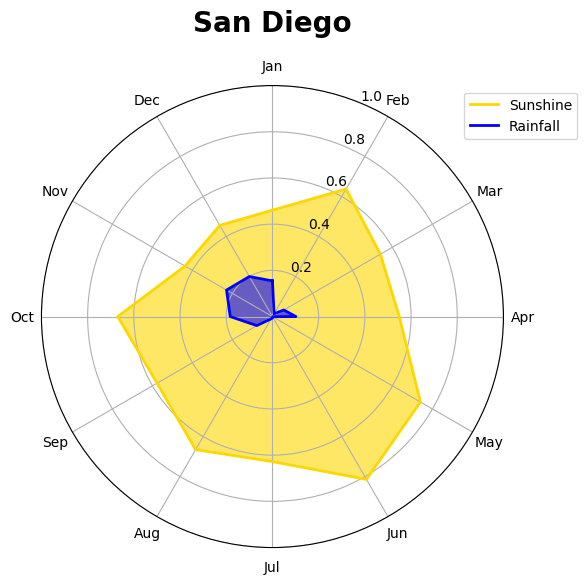

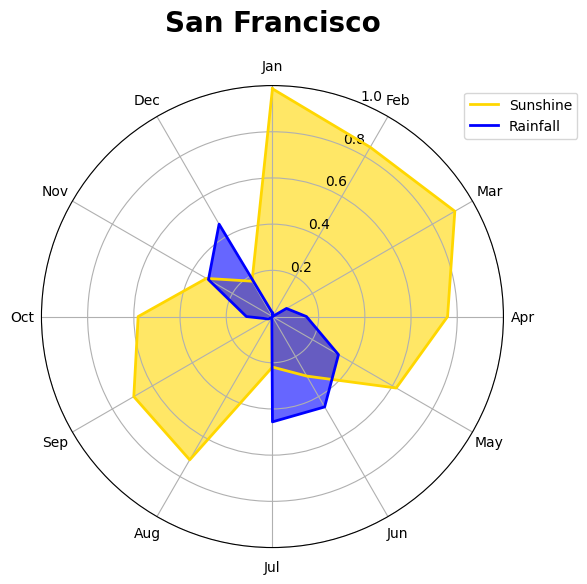

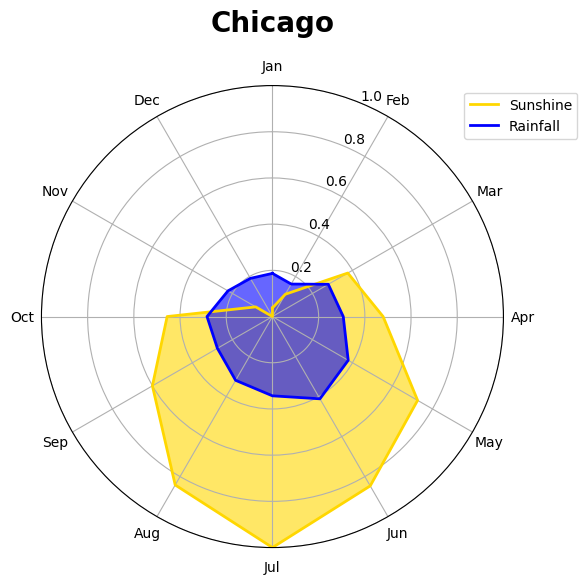

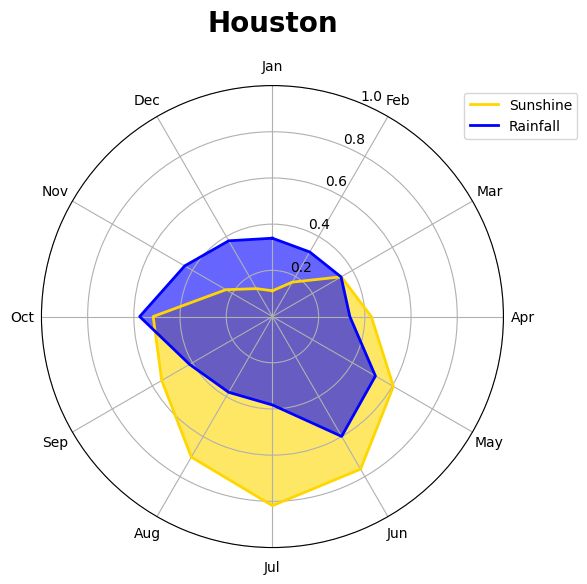

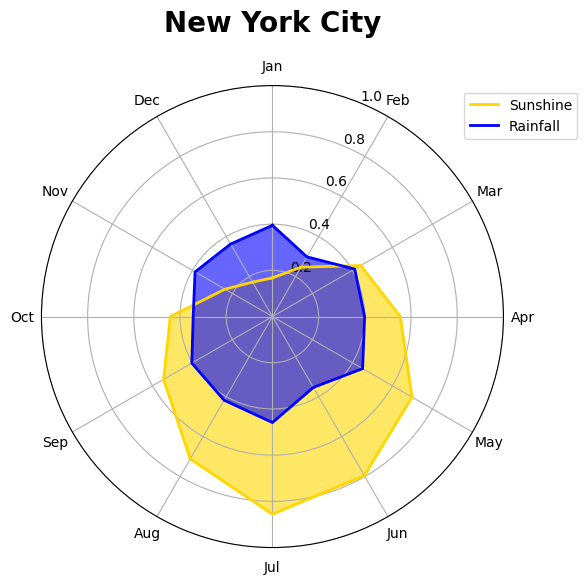

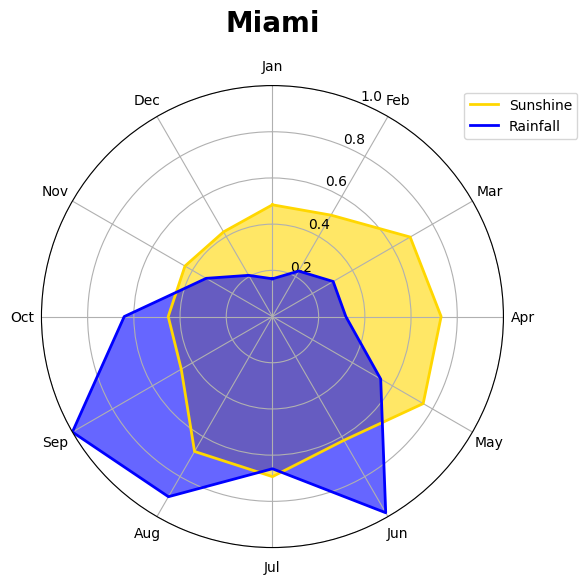

In [35]:
def create_radar_chart(df, city):
    categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    N = len(categories)
    
    sun_data = df[df['city'] == city]['sunshine'].values.flatten().tolist()
    rain_data = df[df['city'] == city]['rain'].values.flatten().tolist()
    
    angles = [n / float(N) * 2 * pi for n in range(N)]

    angles += angles[:1]
    
    sun_data += sun_data[:1]
    rain_data += rain_data[:1]
    
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)  # Rotate chart so January is at the top
    ax.set_theta_direction(-1) 
    plt.xticks(angles[:-1], categories)
    ax.set_ylim(0, 1)
    
    ax.plot(angles, sun_data, linewidth=2, linestyle='solid', label='Sunshine', color='gold')
    ax.fill(angles, sun_data, 'gold', alpha=0.6)
    
    ax.plot(angles, rain_data, linewidth=2, linestyle='solid', label='Rainfall', color='blue')
    ax.fill(angles, rain_data, 'blue', alpha=0.6)
    
    plt.title(f'{city}', fontsize=20, fontweight='bold', y=1.1)
    plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1.0))

# Create radar charts for each city
cities = df['city'].unique()
for city in cities:
    plt.figure(figsize=(6, 6))
    create_radar_chart(df, city)
    plt.show()

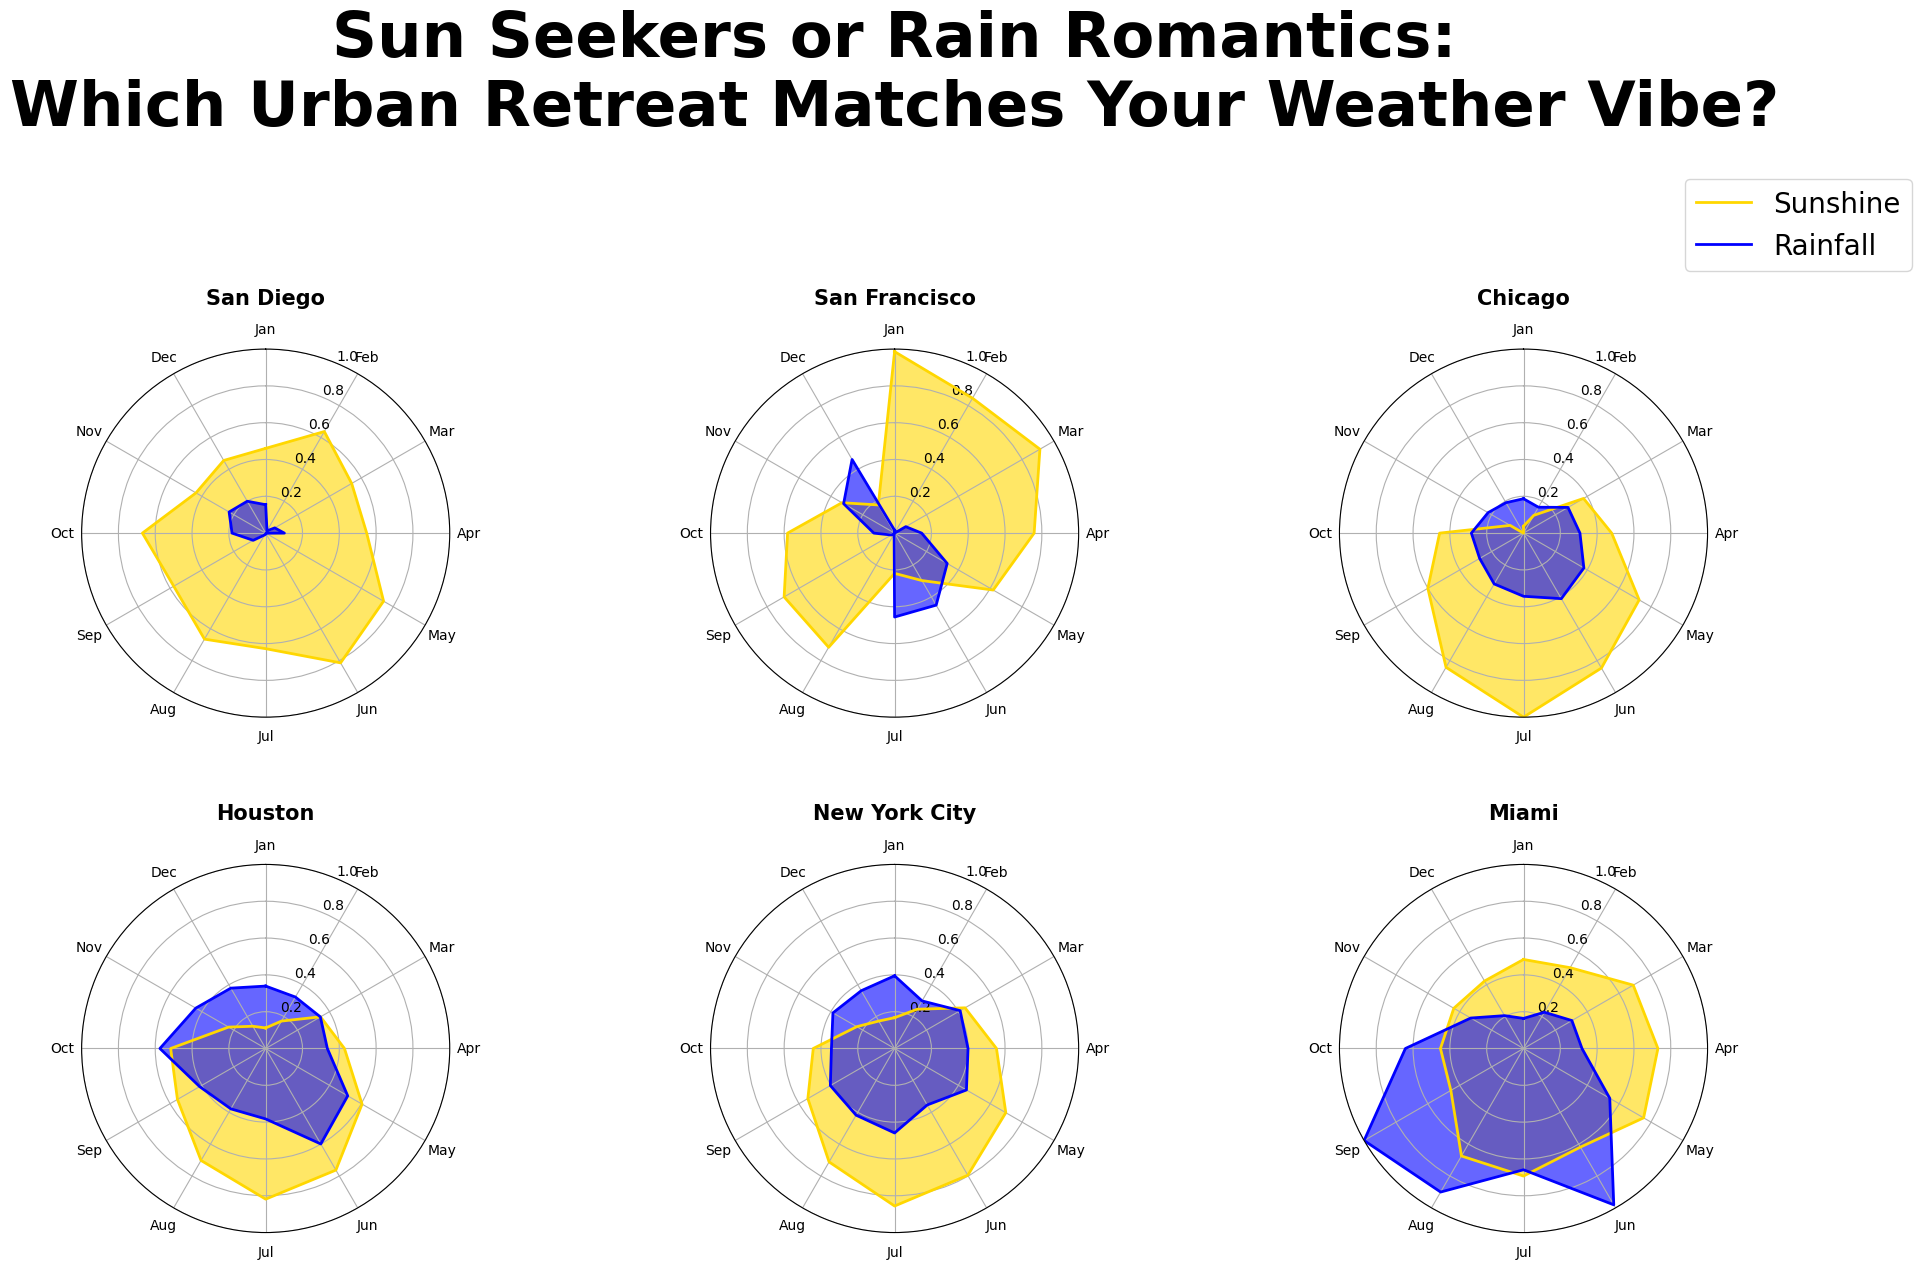

In [63]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(polar=True))
fig.suptitle('Sun Seekers or Rain Romantics:\nWhich Urban Retreat Matches Your Weather Vibe?', fontsize=45, fontweight='bold', y=1.05)

for ax, city in zip(axs.flatten(), cities):
    categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    N = len(categories)
    
    sun_data = df[df['city'] == city]['sunshine'].values.flatten().tolist()
    rain_data = df[df['city'] == city]['rain'].values.flatten().tolist()
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    sun_data += sun_data[:1]
    rain_data += rain_data[:1]
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_ylim(0, 1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    ax.plot(angles, sun_data, linewidth=2, linestyle='solid', label='Sunshine', color='gold')
    ax.fill(angles, sun_data, 'gold', alpha=0.6)
    
    ax.plot(angles, rain_data, linewidth=2, linestyle='solid', label='Rainfall', color='blue')
    ax.fill(angles, rain_data, 'blue', alpha=0.6)
    
    ax.set_title(city, fontsize=15, fontweight='bold', y=1.1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 2.9), fontsize='large', markerscale=2, prop={'size': 20})
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()